# Correlación

Correlación entre x e y: [ 1  4 10 20 35 44 46 40 25]


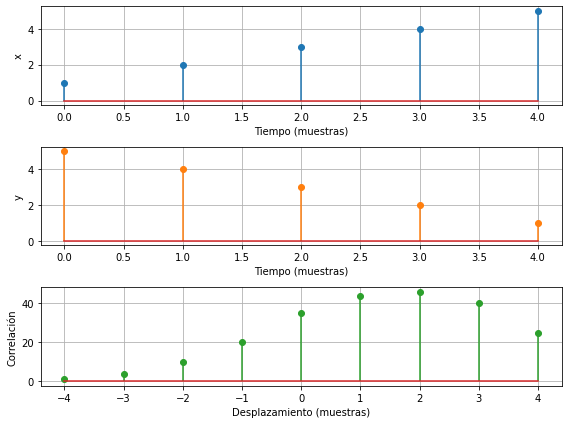

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generar dos señales discretas
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 4, 3, 2, 1])

# Calcular la correlación
corr = np.correlate(x, y, mode='full')

print('Correlación entre x e y:', corr)

# Graficar las señales y la correlación
fig, ax = plt.subplots(3, 1, figsize=(8, 6))

# Señal x
ax[0].stem(x, linefmt='C0-', markerfmt='C0o')
ax[0].set_xlabel('Tiempo (muestras)')
ax[0].set_ylabel('x')
ax[0].grid(True)

# Señal y
ax[1].stem(y, linefmt='C1-', markerfmt='C1o')
ax[1].set_xlabel('Tiempo (muestras)')
ax[1].set_ylabel('y')
ax[1].grid(True)

# Correlación
lags = np.arange(-len(x)+1, len(x))
ax[2].stem(lags, corr, linefmt='C2-', markerfmt='C2o')
ax[2].set_xlabel('Desplazamiento (muestras)')
ax[2].set_ylabel('Correlación')
ax[2].grid(True)

plt.tight_layout()
plt.show()


# Polos y ROC

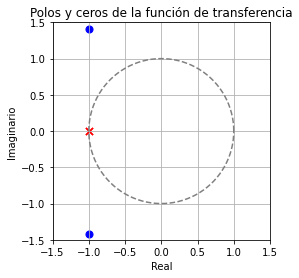

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir función de transferencia
num = [1, 2, 3]
den = [1, 4, 5, 2]
sys = signal.TransferFunction(num, den)

# Trazar ceros y polos
plt.scatter(np.real(sys.zeros), np.imag(sys.zeros), marker='o', s=50, color='blue')
plt.scatter(np.real(sys.poles), np.imag(sys.poles), marker='x', s=50, color='red')

# Trazar circunferencia unitaria
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='--', color='gray')

# Configurar ejes, grilla y título
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Real')
plt.ylabel('Imaginario')
plt.title('Polos y ceros de la función de transferencia')

plt.grid()

# Mostrar figura
plt.show()


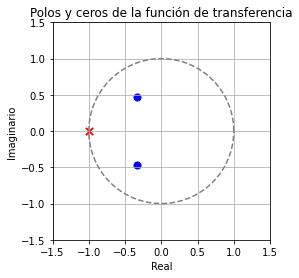

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir función de transferencia
num = [3, 2, 1]
den = [1, 4, 5, 2]
sys = signal.TransferFunction(num, den)

# Trazar ceros y polos
plt.scatter(np.real(sys.zeros), np.imag(sys.zeros), marker='o', s=50, color='blue')
plt.scatter(np.real(sys.poles), np.imag(sys.poles), marker='x', s=50, color='red')

# Trazar circunferencia unitaria
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='--', color='gray')

# Configurar ejes, grilla y título
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Real')
plt.ylabel('Imaginario')
plt.title('Polos y ceros de la función de transferencia')

plt.grid()

# Mostrar figura
plt.show()


# Transformada Z de una secuencia

In [19]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

def transZsec(arr, zero):
    # La funcion recibe un arreglo al cual se le va a sacar la transformada y un dato 'zero' que es la posición del cero de la secuencia.
    Z = Symbol('Z')
    pot = zero
    x_trans = []
    for i in arr:
        x_trans.append((i*Z**pot).evalf())
        pot -= 1
    return x_trans

# Ejemplo de uso
arr = np.array([1, 2, 3, 4, 5])
arr_trans = transZsec(arr, 2)
print(arr_trans)


[Z**2, 2.0*Z, 3.00000000000000, 4.0/Z, 5.0/Z**2]


In [20]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

def transZsec(arr, zero):
    # La funcion recibe un arreglo al cual se le va a sacar la transformada y un dato 'zero' que es la posición del cero de la secuencia.
    Z = Symbol('Z')
    pot = zero
    x_trans = []
    for i in arr:
        x_trans.append(((i*Z**pot).evalf()))
        pot -= 1
    return x_trans

# Ejemplo de uso
arr = np.array([0, 1, -1, 2, -2])
arr_trans = transZsec(arr, 1)
print(arr_trans)


[0, 1.00000000000000, -1/Z, 2.0/Z**2, -2.0/Z**3]


# Tranformada Z de la forma a^n*u(n)

In [24]:


from sympy import *
import numpy as np
import matplotlib.pyplot as plt


def transZfunc(a, despla, desplu):
    # Esta función recibe el valor de a para calcular la
    # transformada por medio de la serie geométrica.
    Z = Symbol('Z')
    result = ''
    if (desplu == despla):
        result += str(np.power(Z, -desplu)) + '('
    if (desplu != 0):
        for i in range(desplu):
            result += str(-np.power(a/Z, i))
    result += '+' + str(1/(1-a*np.power(Z, -1))) + ')'
    return result

# Parámetros de la señal
transZfunc(1/8, 2, 1)



'-1+1/(1 - 0.125/Z))'